In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def outliers_iqr(data):
    Q1=np.percentile(data,25)
    print(Q1)
    Q3=np.percentile(data,75)
    print(Q3)
    IQR=Q3-Q1
    print(IQR)
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    print("lower_bound:",lower_bound)
    print("upper_bound:",upper_bound)
    outliers=[x for x in data if x < lower_bound or x > upper_bound]
    return outliers,lower_bound,upper_bound
expenses=[20,34,78,100,3000,2000,5000,4000,7800,99000,10000]
df = pd.DataFrame(expenses, columns=["expenses"])
outliers1,lb1,ub1=outliers_iqr(df["expenses"])
print("Case 1: Monthly Expenses")
print("Outliers:", outliers1)

89.0
6400.0
6311.0
lower_bound: -9377.5
upper_bound: 15866.5
Case 1: Monthly Expenses
Outliers: [99000]


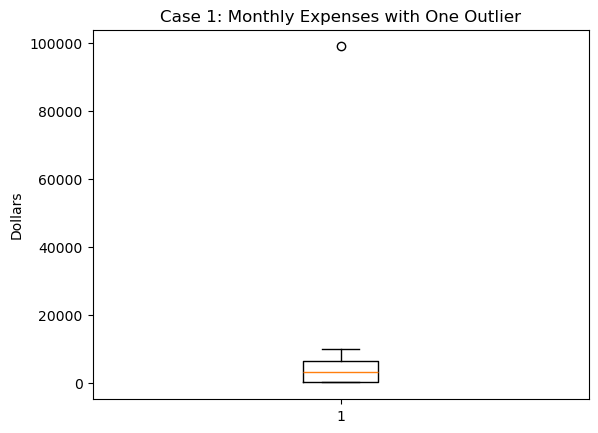

In [61]:
plt.boxplot(df["expenses"])
plt.title("Case 1: Monthly Expenses with One Outlier")
plt.ylabel("Dollars")
plt.show()

In [62]:
df_no_outliers=df[(df['expenses'] >= lb1) & (df['expenses'] <= ub1)]
print("Outliers:", outliers1)
print("\nData without outliers:\n", df_no_outliers)

Outliers: [99000]

Data without outliers:
     expenses
0         20
1         34
2         78
3        100
4       3000
5       2000
6       5000
7       4000
8       7800
10     10000


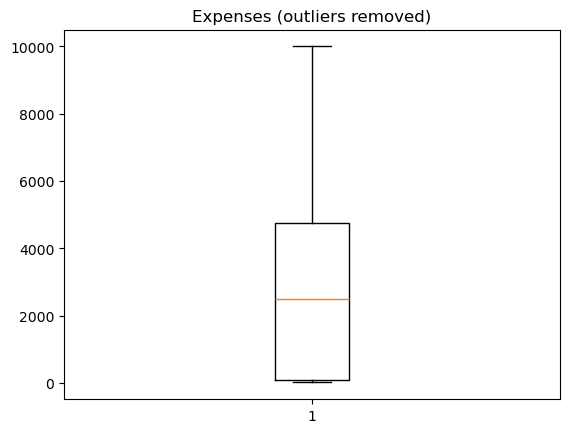

In [63]:
# Plot cleaned data (without outliers)
plt.boxplot(df_no_outliers["expenses"])
plt.title("Expenses (outliers removed)")
plt.show()

In [64]:
prices=[20,21,23,24,27,28,26,25,22]
df = pd.DataFrame(prices, columns=["prices"])
outliers2,lb2,ub2=outliers_iqr(prices)
print("Case 2: Monthly prices")
print("Outliers:", outliers2)

22.0
26.0
4.0
lower_bound: 16.0
upper_bound: 32.0
Case 2: Monthly prices
Outliers: []


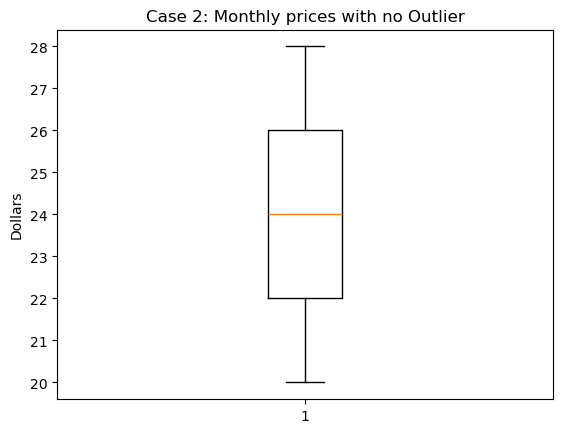

In [65]:
plt.boxplot(df["prices"])
plt.title("Case 2: Monthly prices with no Outlier")
plt.ylabel("Dollars")
plt.show()

In [66]:
marks=[10,70,80,90,100,200]
df = pd.DataFrame(marks, columns=["marks"])
outliers3,lb3,ub3=outliers_iqr(marks)
print("Case 3: Marks")
print("Outliers:", outliers3)

72.5
97.5
25.0
lower_bound: 35.0
upper_bound: 135.0
Case 3: Marks
Outliers: [10, 200]


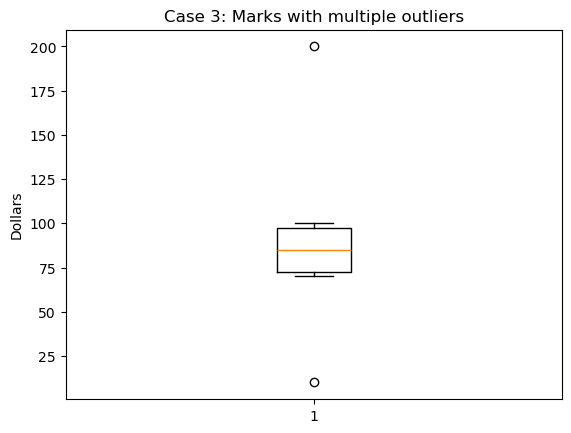

In [67]:
plt.boxplot(df["marks"])
plt.title("Case 3: Marks with multiple outliers")
plt.ylabel("Dollars")
plt.show()

In [68]:
df_no_outliers=df[(df['marks'] >= lb3) & (df['marks'] <= ub3)]
print("Outliers:", outliers3)
print("\nData without outliers:\n", df_no_outliers)

Outliers: [10, 200]

Data without outliers:
    marks
1     70
2     80
3     90
4    100


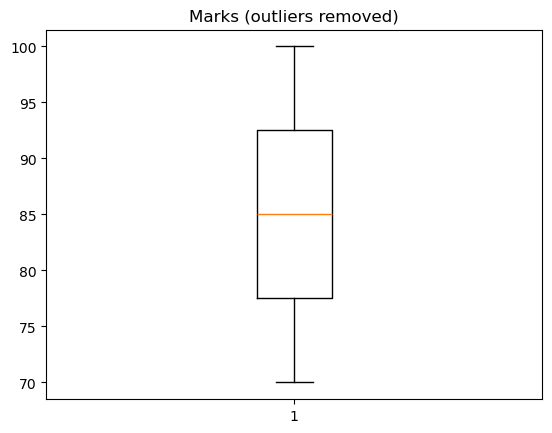

In [69]:
plt.boxplot(df_no_outliers["marks"])
plt.title("Marks (outliers removed)")
plt.show()

In [70]:
values = [1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame(values, columns=["values"])

# Log transform (ln(1 + x))
df['log_values'] = np.log1p(df['values'])
df[['values','log_values']]

,values,log_values
0,1,0.693147
1,2,1.098612
2,3,1.386294
3,4,1.609438
4,5,1.791759
5,6,1.945910
6,7,2.079442
7,8,2.197225
8,9,2.302585
9,10,2.397895


In [78]:
marks=[10,70,80,90,100,200]
df = pd.DataFrame(marks, columns=["marks"])
outliers3,lb3,ub3=outliers_iqr(marks)
print("Case 3: Marks")
print("Outliers:", outliers3)
median = df["marks"].median()
print("Median:",median)
df.loc[df["marks"] > ub3, "marks"] = median
df.loc[df["marks"] < lb3, "marks"] = median

print("\nData after replacing outliers with median:\n", df)

72.5
97.5
25.0
lower_bound: 35.0
upper_bound: 135.0
Case 3: Marks
Outliers: [10, 200]
Median: 85.0

Data after replacing outliers with median:
    marks
0     85
1     70
2     80
3     90
4    100
5     85


In [79]:
expenses=[20,34,78,100,3000,2000,5000,4000,7800,99000,10000]
df = pd.DataFrame(expenses, columns=["expenses"])
outliers1,lb1,ub1=outliers_iqr(df["expenses"])
print("Case 1: Monthly Expenses")
print("Outliers:", outliers1)
median = df["expenses"].median()
print("Median:",median)
df.loc[df["expenses"] > ub1, "expenses"] = median
df.loc[df["expenses"] < lb1, "expenses"] = median

print("\nData after replacing outliers with median:\n", df)

89.0
6400.0
6311.0
lower_bound: -9377.5
upper_bound: 15866.5
Case 1: Monthly Expenses
Outliers: [99000]
Median: 3000.0

Data after replacing outliers with median:
     expenses
0         20
1         34
2         78
3        100
4       3000
5       2000
6       5000
7       4000
8       7800
9       3000
10     10000


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male']}
df = pd.DataFrame(data)

le = LabelEncoder()
df['Gender_Label'] = le.fit_transform(df['Gender'])
df


,Gender,Gender_Label
0,Male,1
1,Female,0
2,Female,0
3,Male,1
4,Male,1


In [3]:
df_colors = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})
df_colors


,Color
0,Red
1,Blue
2,Green
3,Blue
4,Red


In [4]:
df_onehot = pd.get_dummies(df_colors, columns=['Color'])
df_onehot

,Color_Blue,Color_Green,Color_Red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [5]:
from sklearn.preprocessing import MinMaxScaler

salaries = [[3000], [4000], [5000], [6000], [10000]]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(salaries)
print(scaled)

[[0.        ]
 [0.14285714]
 [0.28571429]
 [0.42857143]
 [1.        ]]


In [6]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(salaries)
print(scaled_std)

[[-1.07588766]
 [-0.66208471]
 [-0.24828177]
 [ 0.16552118]
 [ 1.82073295]]


In [7]:
from sklearn.preprocessing import RobustScaler

salaries_with_outlier = [[3000], [4000], [5000], [6000], [100000]]
scaler_robust = RobustScaler()
scaled_robust = scaler_robust.fit_transform(salaries_with_outlier)
print(scaled_robust)

[[-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [47.5]]


In [8]:
ages = [5, 12, 17, 25, 40, 60, 75]
df_ages = pd.DataFrame({'Age': ages})

# Define bins
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_ages['Age_Group'] = pd.cut(df_ages['Age'], bins=bins, labels=labels)
df_ages

,Age,Age_Group
0,5,Child
1,12,Child
2,17,Teen
3,25,Young Adult
4,40,Adult
5,60,Adult
6,75,Senior


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
a={'Fruit':['Apple','Banana','Mango','Peach','Grapes','Mango','Apple']}
data=pd.DataFrame(a)
le=LabelEncoder()
data['Fruit_label']=le.fit_transform(data['Fruit'])
data

,Fruit,Fruit_label
0,Apple,0
1,Banana,1
2,Mango,3
3,Peach,4
4,Grapes,2
5,Mango,3
6,Apple,0


In [4]:
data1=pd.get_dummies(data)
data1

,Fruit_label,Fruit_Apple,Fruit_Banana,Fruit_Grapes,Fruit_Mango,Fruit_Peach
0,0,True,False,False,False,False
1,1,False,True,False,False,False
2,3,False,False,False,True,False
3,4,False,False,False,False,True
4,2,False,False,True,False,False
5,3,False,False,False,True,False
6,0,True,False,False,False,False


In [6]:
from sklearn.preprocessing import MinMaxScaler
b= [[50], [60], [70], [90], [100]]
scalar=MinMaxScaler()
scaled=scalar.fit_transform(b)
scaled

array([[0. ],
       [0.2],
       [0.4],
       [0.8],
       [1. ]])

In [7]:
from sklearn.preprocessing import StandardScaler
d = [[10], [20], [30], [40], [50]]
scalar_std=StandardScaler()
scaled_std=scalar_std.fit_transform(d)
scaled_std

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

In [8]:
from sklearn.preprocessing import RobustScaler
t = [[10], [20], [30], [40], [1000]] 
scalar_robust=RobustScaler()
scaled_robust=scalar_robust.fit_transform(t)
scaled_robust

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [48.5]])

In [9]:
ages = [3, 10, 15, 22, 45, 70, 85]
df_ages = pd.DataFrame({'Age': ages})

bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_ages['Age_Group'] = pd.cut(df_ages['Age'], bins=bins, labels=labels)
print(df_ages)


   Age    Age_Group
0    3        Child
1   10        Child
2   15         Teen
3   22  Young Adult
4   45        Adult
5   70       Senior
6   85       Senior
